#Data pruning is the process of removing or reducing the size of a dataset by eliminating irrelevant, redundant, or low-value data. The goal is to make the dataset more manageable, efficient, and meaningful for analysis.


# Pruning in DT

# it reffers to the process of reducing /triming the size of the treee by removing nodes which do not provide  significent predictive power or genralize ability


# it is done to pervent overfitting

In [ ]:
import pandas as pd
import numpy as np
import io
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_pruning (1).csv to train_pruning (1).csv


# load the training data

In [ ]:
train=pd.read_csv(io.BytesIO(uploaded['train_pruning (1).csv']))

In [ ]:
train.sample(2).T

,218738,125014
id,218739,125015
Gender,Female,Female
Age,28,35
Driving_License,1,1
Region_Code,28.0,30.0
Previously_Insured,0,0
Vehicle_Age,< 1 Year,1-2 Year
Vehicle_Damage,Yes,Yes
Annual_Premium,39501.0,21832.0
Policy_Sales_Channel,160.0,154.0


In [ ]:
# encoding Gender, vehicle_age and vehicle_damage columns
train['Gender'].replace('Male',1,inplace=True)
train['Gender'].replace('Female',0,inplace=True)

train['Vehicle_Damage'].replace('Yes',1,inplace=True)
train['Vehicle_Damage'].replace('No',0,inplace=True)

train['Vehicle_Age'].replace('1-2 Year',0,inplace=True)
train['Vehicle_Age'].replace('< 1 Year',1,inplace=True)
train['Vehicle_Age'].replace('> 2 Years',2,inplace=True )


In [ ]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


# load the test data

In [ ]:
test=pd.read_csv(io.BytesIO(uploaded['train_pruning (1).csv']))

In [ ]:
# encoding Gender, vehicle_age and vehicle_damage columns
test['Gender'].replace('Male',1,inplace=True)
test['Gender'].replace('Female',0,inplace=True)

test['Vehicle_Damage'].replace('Yes',1,inplace=True)
test['Vehicle_Damage'].replace('No',0,inplace=True)

test['Vehicle_Age'].replace('1-2 Year',0,inplace=True)
test['Vehicle_Age'].replace('< 1 Year',1,inplace=True)
test['Vehicle_Age'].replace('> 2 Years',2,inplace=True )

In [ ]:
Xtrain=train.drop(['id','Response'],axis=1)


In [ ]:
ytrain=train['Response']

In [ ]:
ytrain

,Response
0,1
1,0
2,1
3,0
4,0
...,...
381104,0
381105,0
381106,0
381107,0


In [ ]:
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [ ]:
Xtest=test.drop('id',axis=1)

In [ ]:
Xtrain.shape,ytrain.shape, Xtest.shape

((381109, 10), (381109,), (381109, 11))

In [ ]:
len(Xtest)/len(Xtrain)*100

100.0

In [ ]:
### base line - basic decision tree model
# create training and validation set

X_train,X_val,y_train,y_val=train_test_split(Xtrain,ytrain,test_size=0.2,random_state=45)

In [ ]:
X_train.shape,X_val.shape

((304887, 10), (76222, 10))

In [ ]:
len(X_val)/len(Xtrain)*100

20.000052478424806

# Training the model

In [ ]:
base_model=DecisionTreeClassifier()

In [ ]:
base_model_DT=base_model.fit(X_train,y_train)


#predict the validation set

In [ ]:
pred_value=base_model_DT.predict(X_val)

# eveluate the model performance

In [ ]:
print(classification_report(y_val,pred_value))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     66875
           1       0.29      0.31      0.30      9347

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.82      0.82     76222



# pruning in DT

In [ ]:
# altrate max_depth till 30

max_depth=[]    #[] empoty list
acc_gini=[]
acc_entropy=[]

for i in range(1,31):   # range from 1-30
  #gini as a criterion
  dtree = DecisionTreeClassifier(criterion='gini',max_depth=i)
  dtree.fit(X_train,y_train)
  pred=dtree.predict(X_val)

  acc_gini.append(accuracy_score(y_val,pred))   # append update the list

   #entropy as a criterion
  dtree = DecisionTreeClassifier(criterion='entropy',max_depth=i)
  dtree.fit(X_train,y_train)
  pred=dtree.predict(X_val)

  acc_entropy.append(accuracy_score(y_val,pred))

  max_depth.append(i)

In [ ]:
acc_entropy

[0.8773713625987247,
 0.8773713625987247,
 0.8773713625987247,
 0.8773713625987247,
 0.8773713625987247,
 0.8773713625987247,
 0.8773320038833933,
 0.8772795255962845,
 0.877240166880953,
 0.8769384167300779,
 0.8761906011387788,
 0.8757182965548005,
 0.8746949699561807,
 0.8741177087979848,
 0.8726614363307181,
 0.8717168271627614,
 0.8696308152501903,
 0.8674267271916245,
 0.8654063131379391,
 0.8640812363884443,
 0.8613654850305686,
 0.8589777229671224,
 0.855842145312377,
 0.8540578835506809,
 0.8513946104799139,
 0.8486788591220382,
 0.8465403689223584,
 0.8446773897299992,
 0.8430899215449608,
 0.8417386056519115]

In [ ]:
acc_gini

[0.8773713625987247,
 0.8773713625987247,
 0.8773713625987247,
 0.8773713625987247,
 0.8773713625987247,
 0.8773713625987247,
 0.8773320038833933,
 0.8771352103067356,
 0.8770302537325182,
 0.8767809818687518,
 0.8758494922725722,
 0.8753509485450395,
 0.8745375350948545,
 0.8726089580436095,
 0.8717168271627614,
 0.869906326257511,
 0.8669937813229777,
 0.8654587914250479,
 0.8624806486316287,
 0.8597255385584215,
 0.8571541024900947,
 0.8535724593949253,
 0.8496497074335494,
 0.8472750649418803,
 0.8453202487470809,
 0.8430899215449608,
 0.8409907900606124,
 0.8393639631602424,
 0.8367269292330298,
 0.835782320065073]

In [ ]:
len(acc_gini),len(acc_entropy),len(max_depth)

(30, 30, 30)

In [ ]:
# create a data frame --- required for plotting
df_matric = pd.DataFrame({'acc_gini':pd.Series(acc_gini),
                        'acc_entropy':pd.Series(acc_entropy),
                         'max_depth': pd.Series(max_depth)})    # 3 list into a dataframe

In [ ]:
df_matric

,acc_gini,acc_entropy,max_depth
0,0.877371,0.877371,1
1,0.877371,0.877371,2
2,0.877371,0.877371,3
3,0.877371,0.877371,4
4,0.877371,0.877371,5
5,0.877371,0.877371,6
6,0.877332,0.877332,7
7,0.877135,0.877280,8
8,0.877030,0.877240,9
9,0.876781,0.876938,10


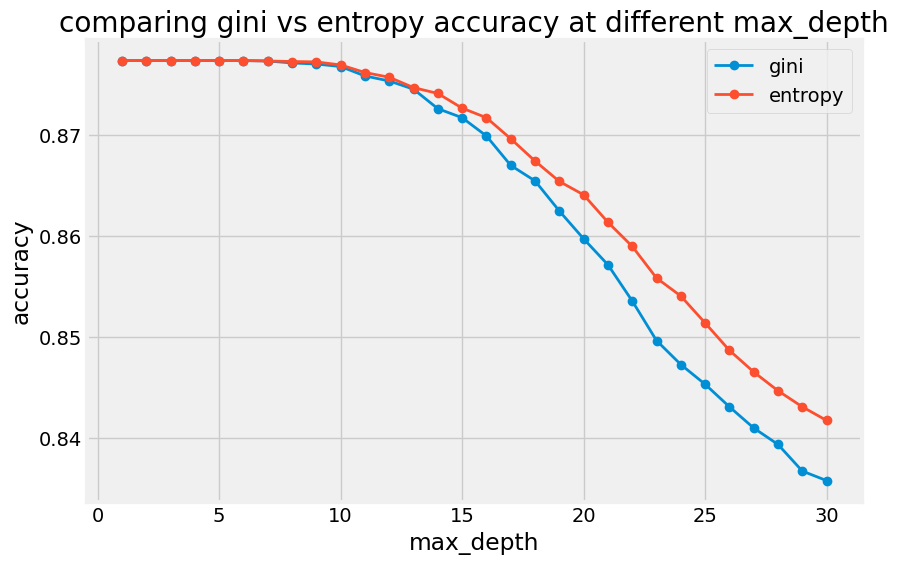

In [ ]:
#plotg a gini vs entropy values against max_depth
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
plt.plot(df_matric['max_depth'],df_matric['acc_gini'],label='gini', linewidth= 2,marker='o')
plt.plot(df_matric['max_depth'],df_matric['acc_entropy'],label='entropy',linewidth=2,marker='o')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('comparing gini vs entropy accuracy at different max_depth')
plt.legend()
plt.show()

# both the accuracy max_depht at 3 gini and entropy performing path  and after accuracy goes down

# the best accuracy score can be achived at max_depth = 1 -3

In [ ]:
pruned_model=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [ ]:
pruned_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
pred_values=pruned_model.predict(X_val)

In [ ]:
print(classification_report(y_val,pred_values))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66875
           1       0.00      0.00      0.00      9347

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# accuracy has imroved by .6% from the baseline to pruned model

#task - perform hyper parameters tuning(HPT)  and compare the accuracy with base line and pruned model

# plot decision tree diagram

In [ ]:
pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 75.9 MB/s eta 0:00:00


In [ ]:
import sweetviz
my_report=sweetviz.analyze([train,'age'])

                                             |          | [  0%]   00:00 -> (? left)


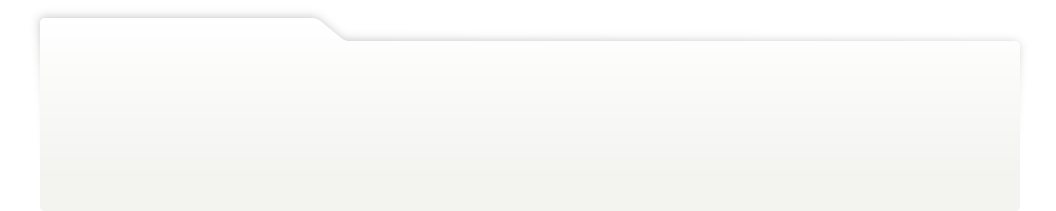
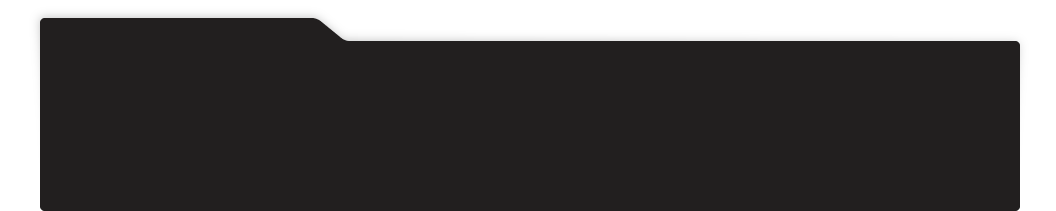
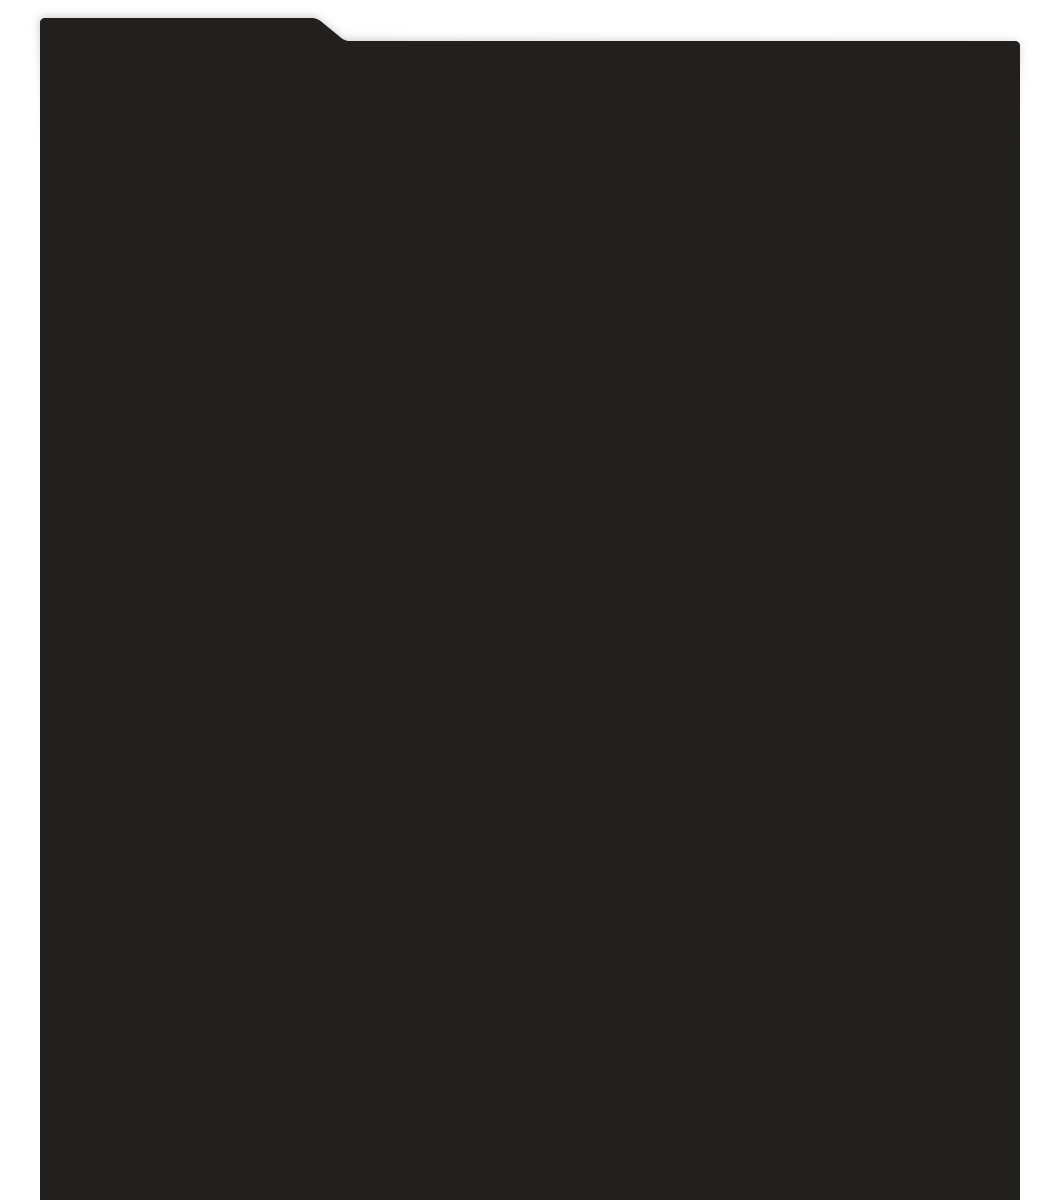
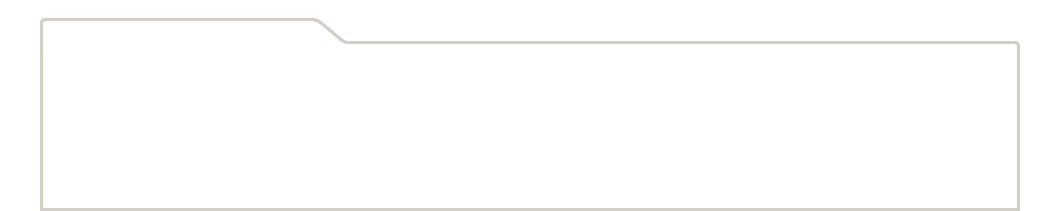
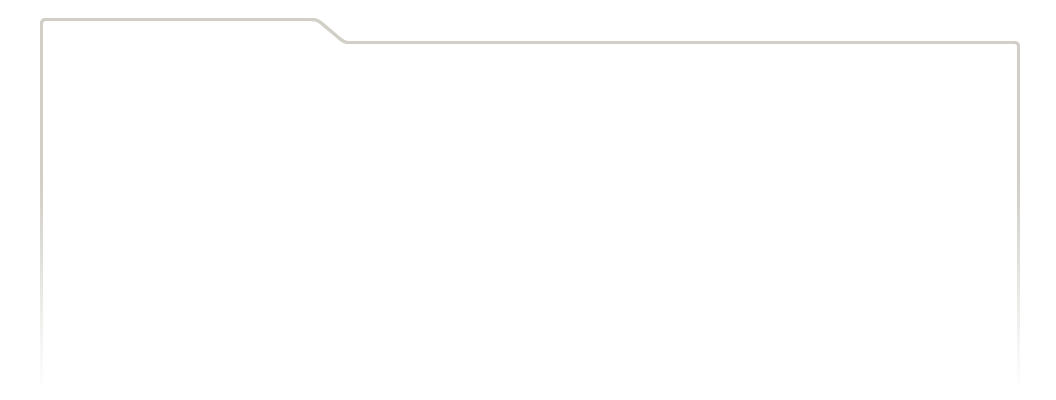
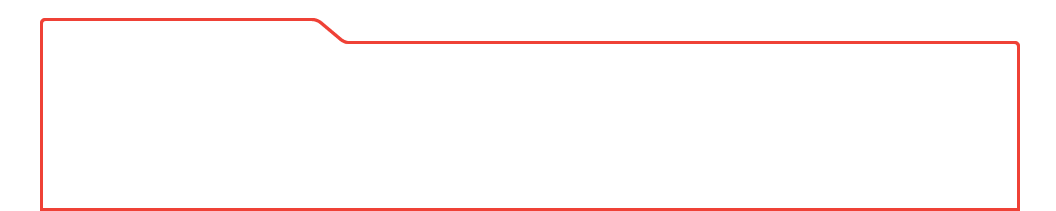
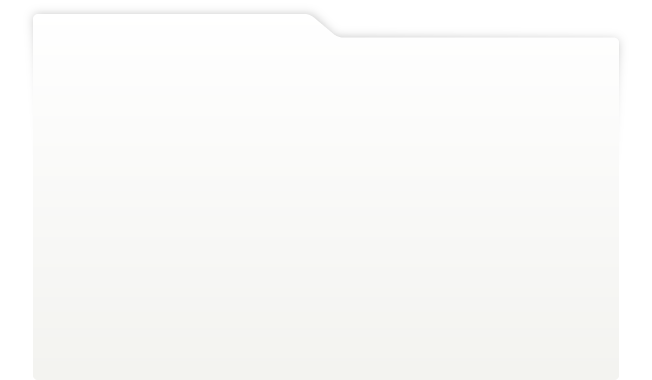
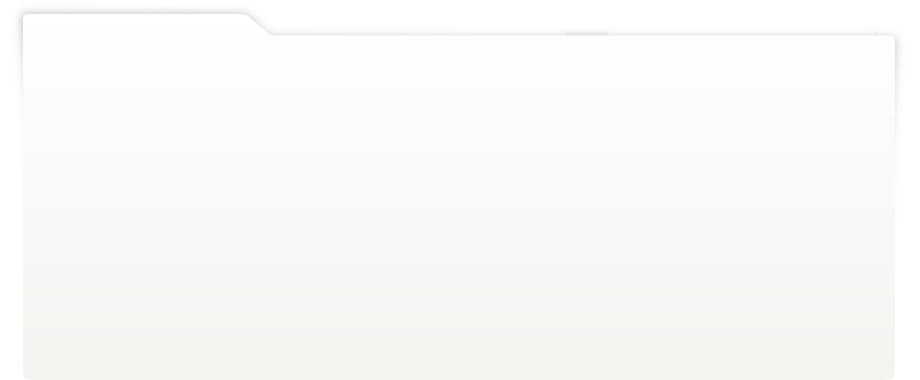
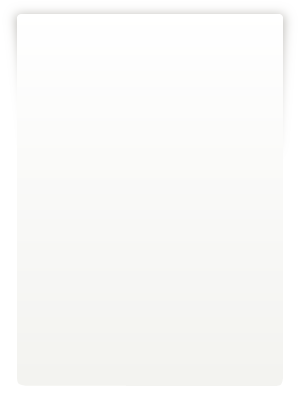
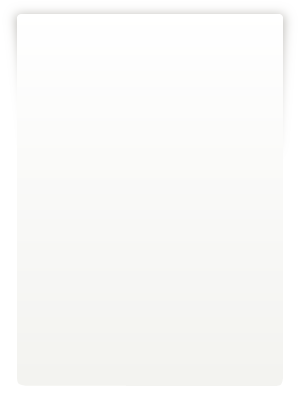
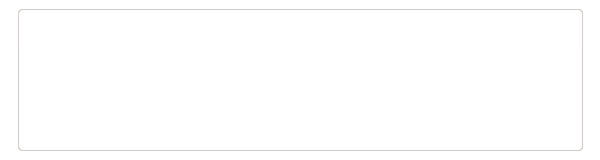
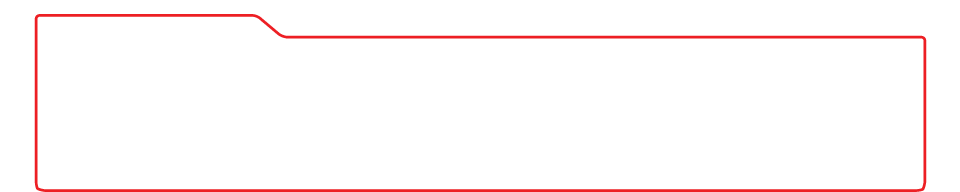
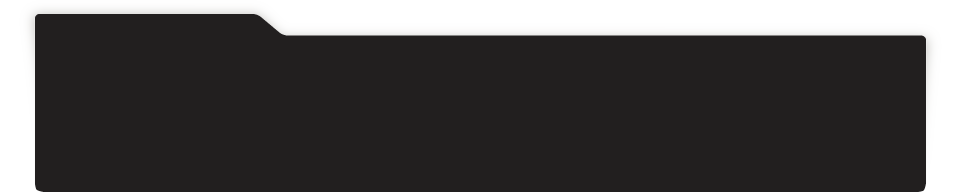
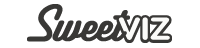
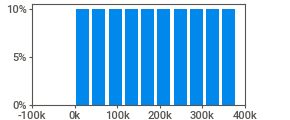
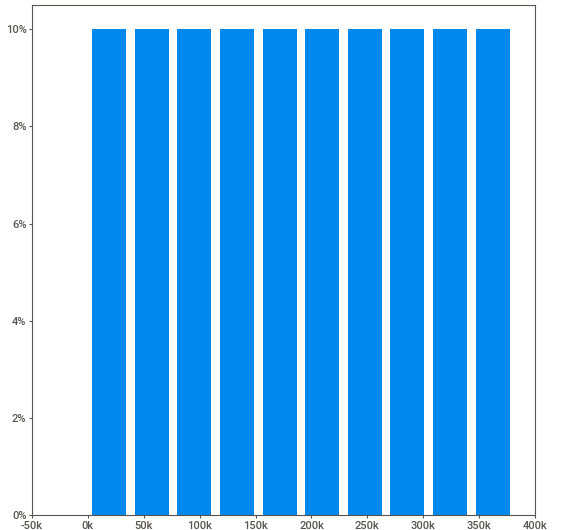
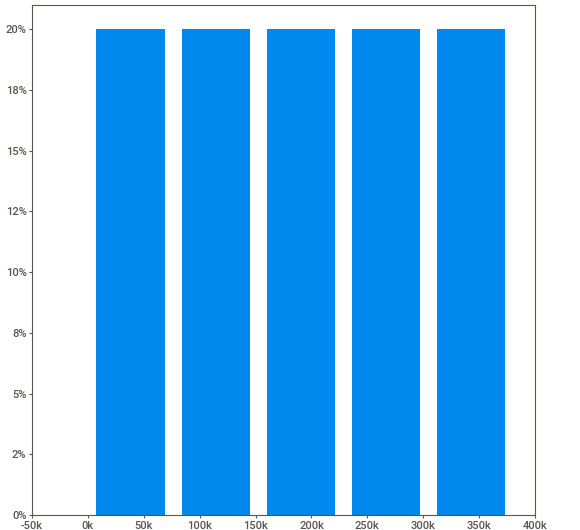
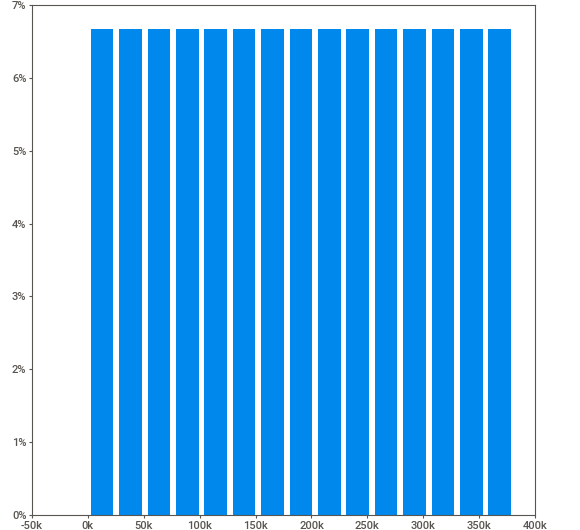
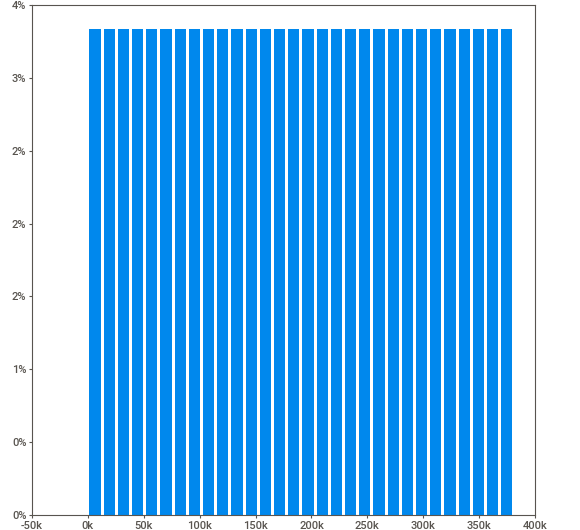
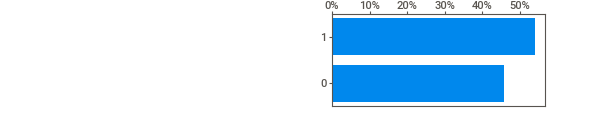
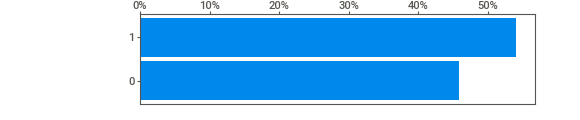
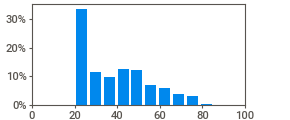
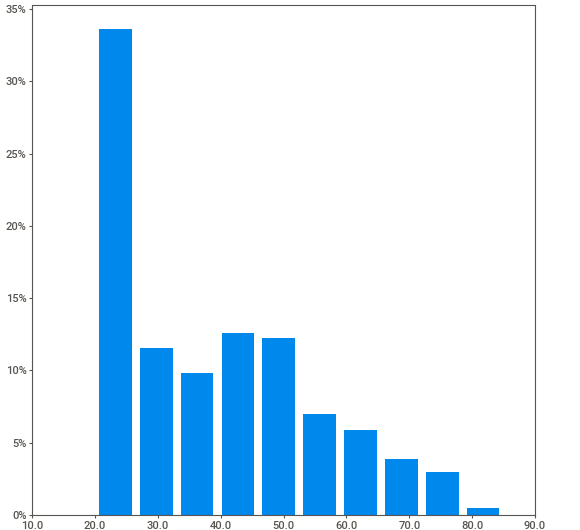
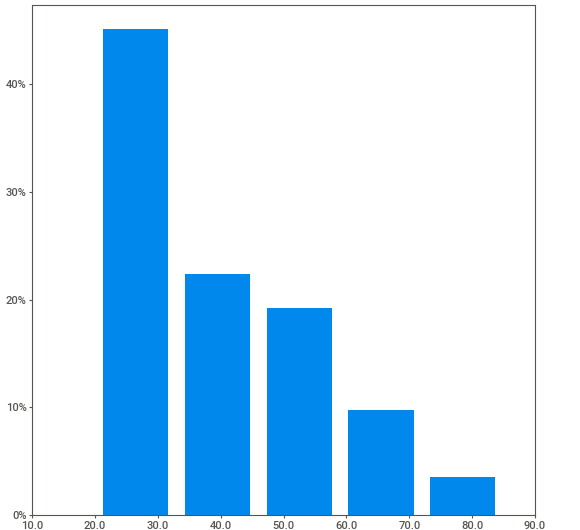
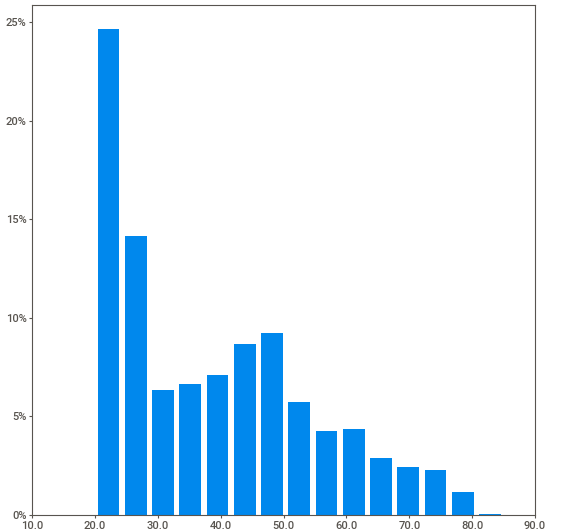
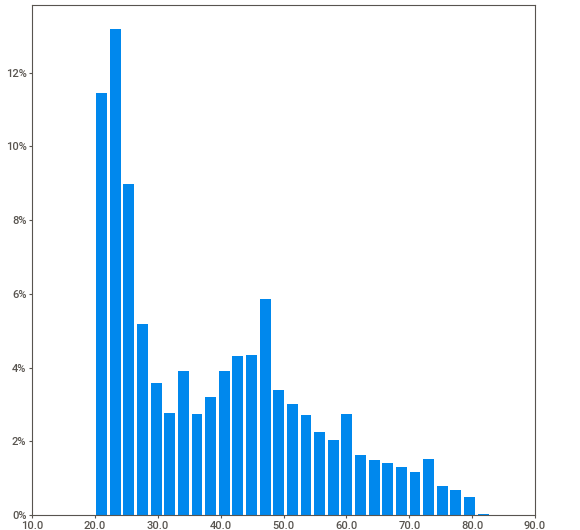
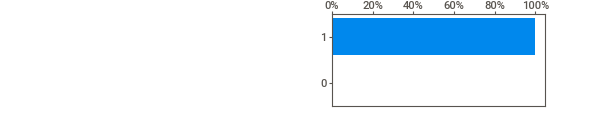
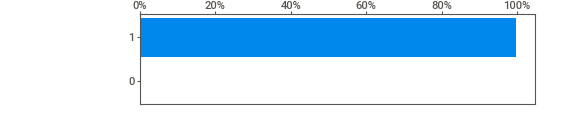
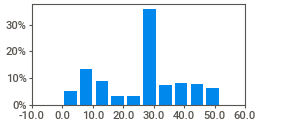
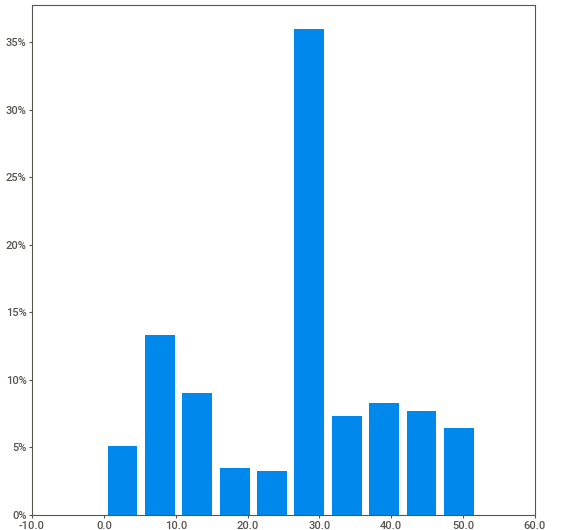
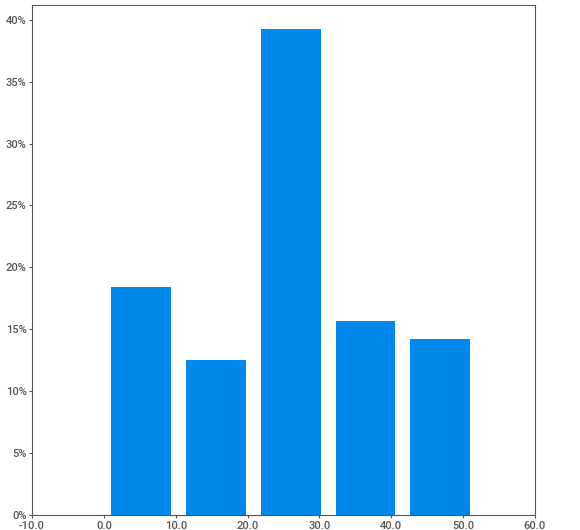
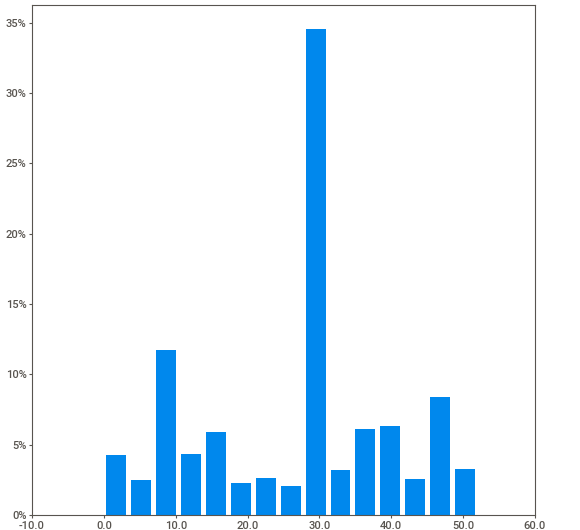
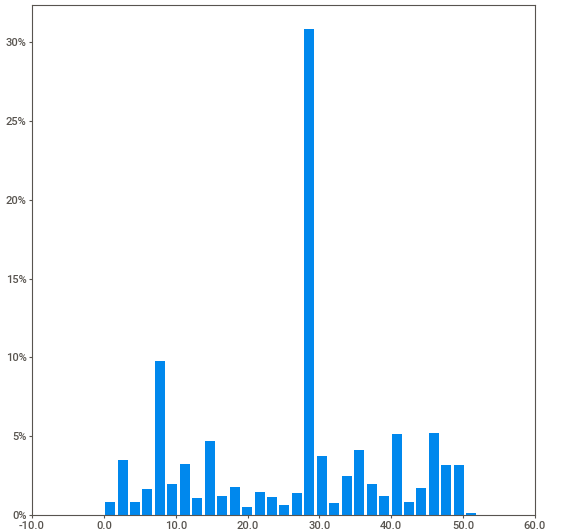
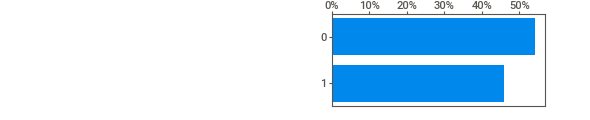
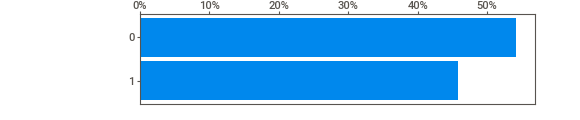
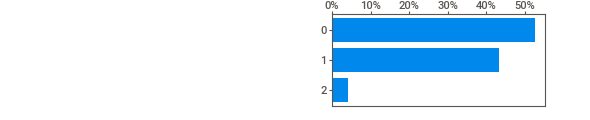
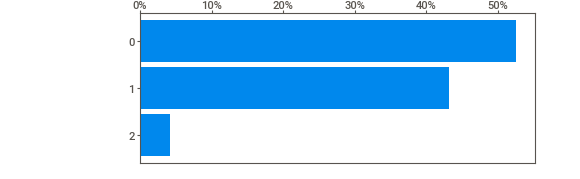
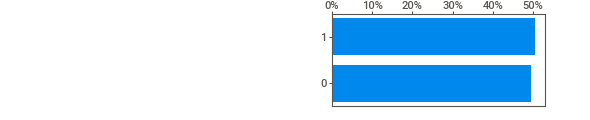
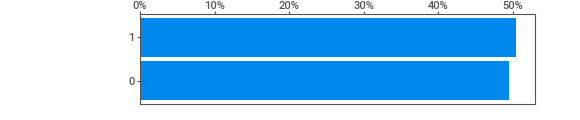
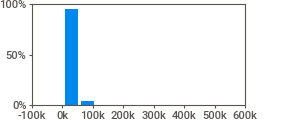
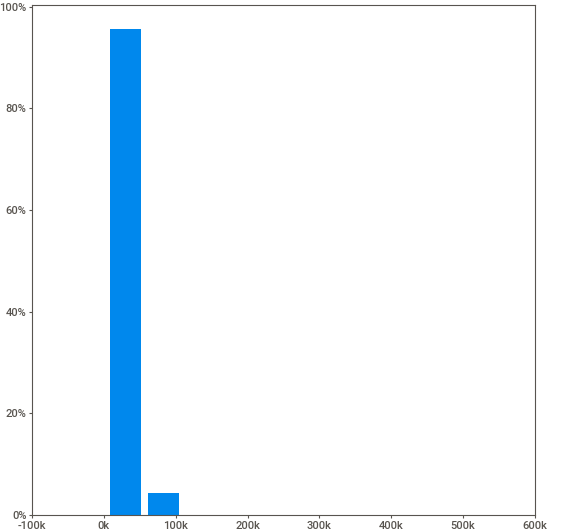
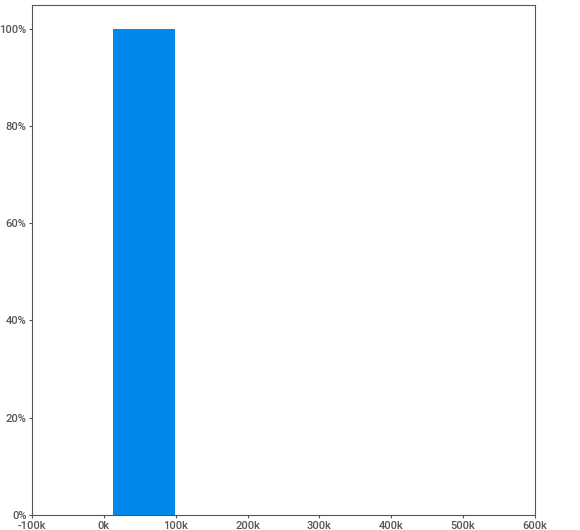
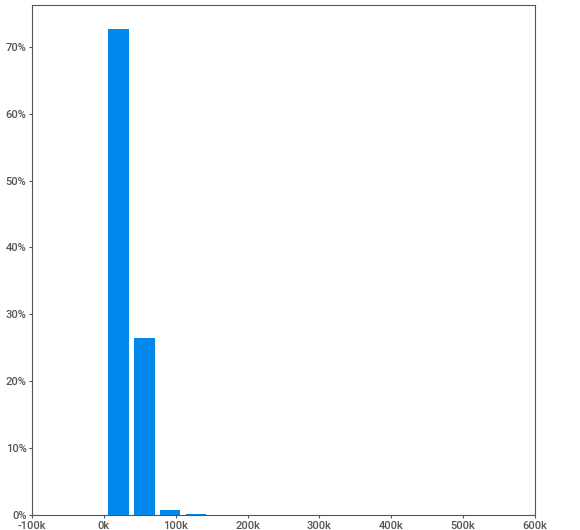
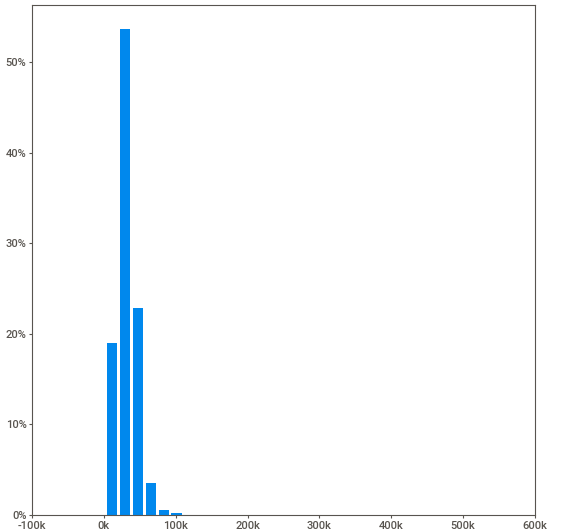
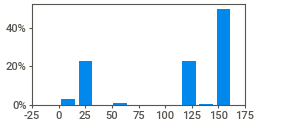
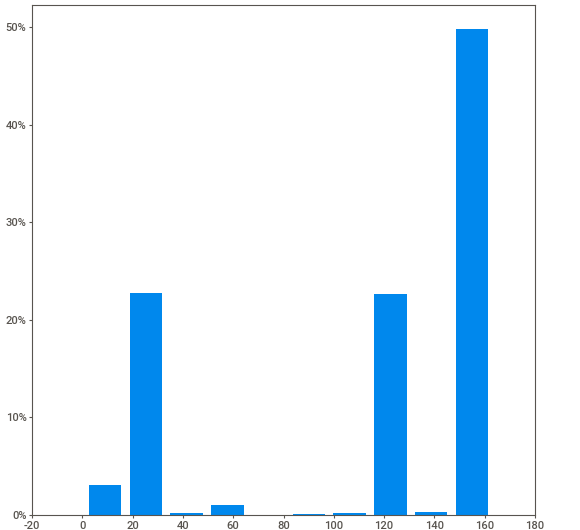
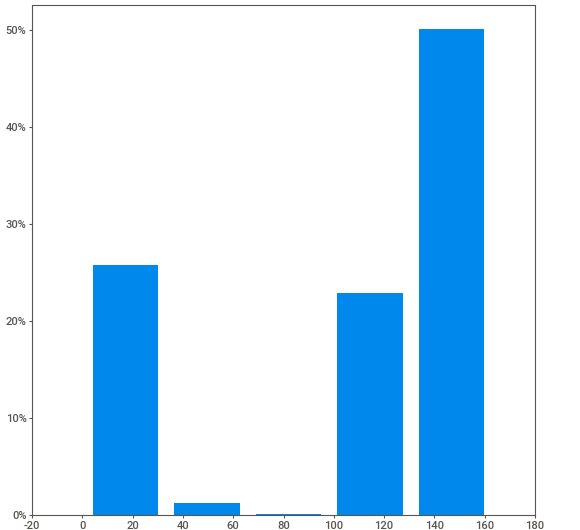
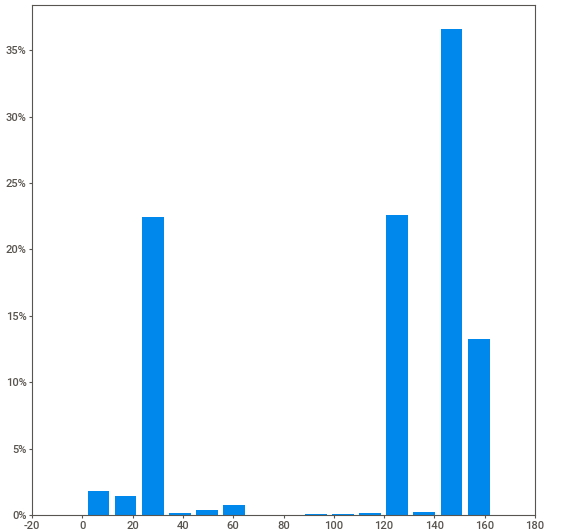
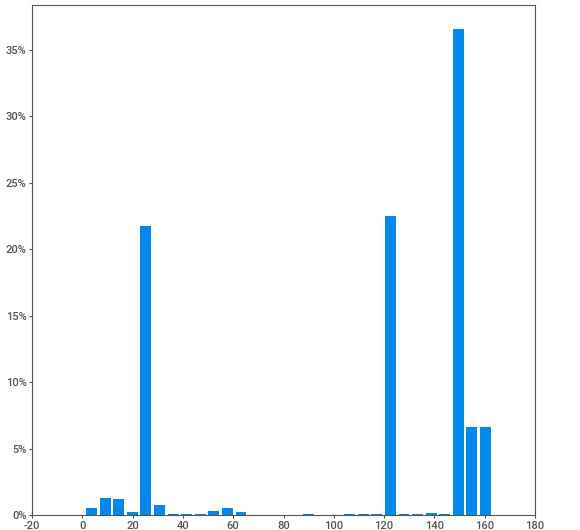
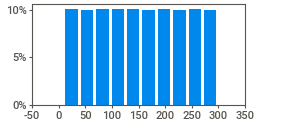
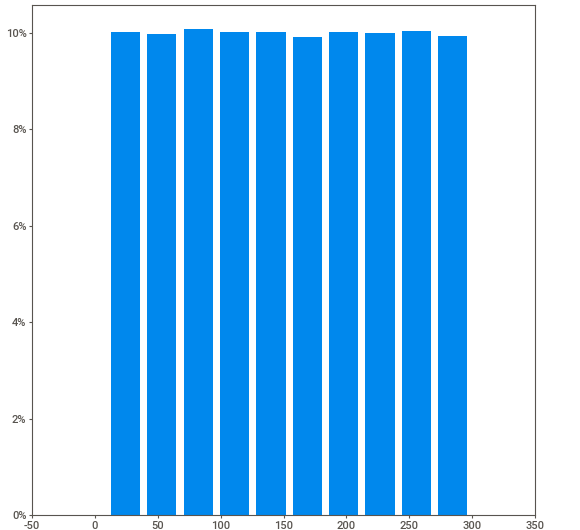
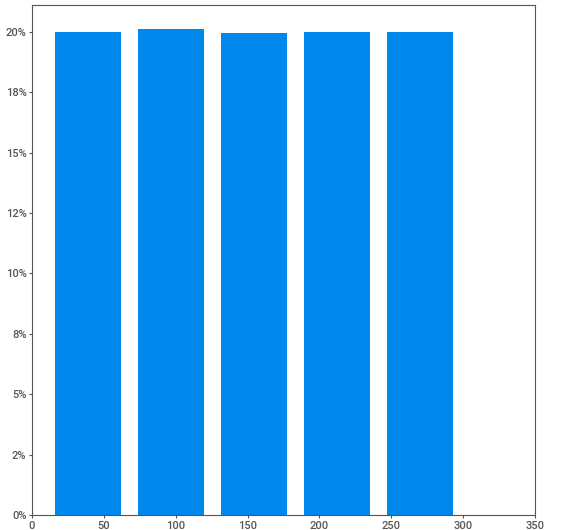
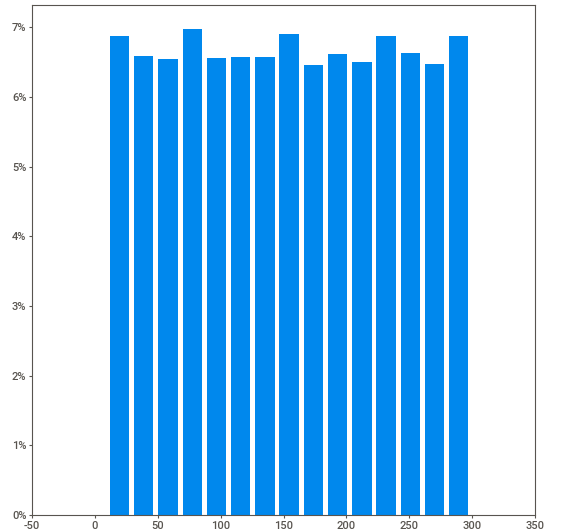
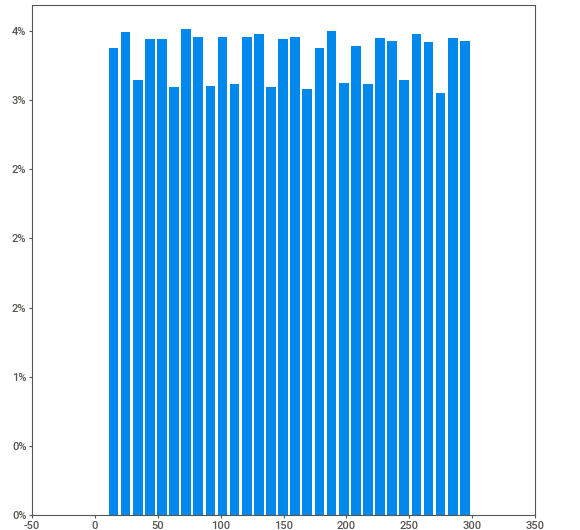
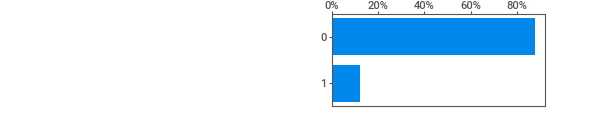
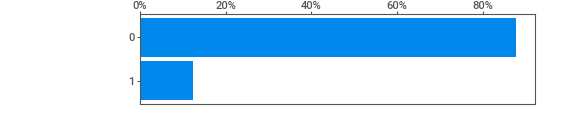
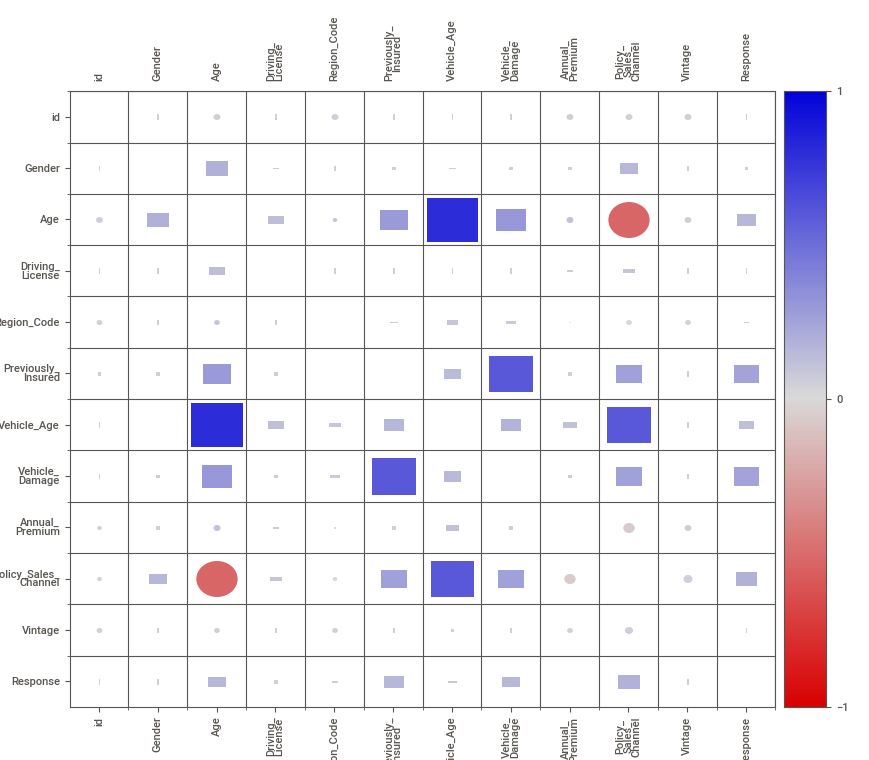
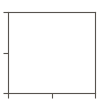

In [ ]:
my_report.show_notebook()

#D - Tale

In [ ]:
9

9

In [ ]:
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [ ]:
from sklearn import tree

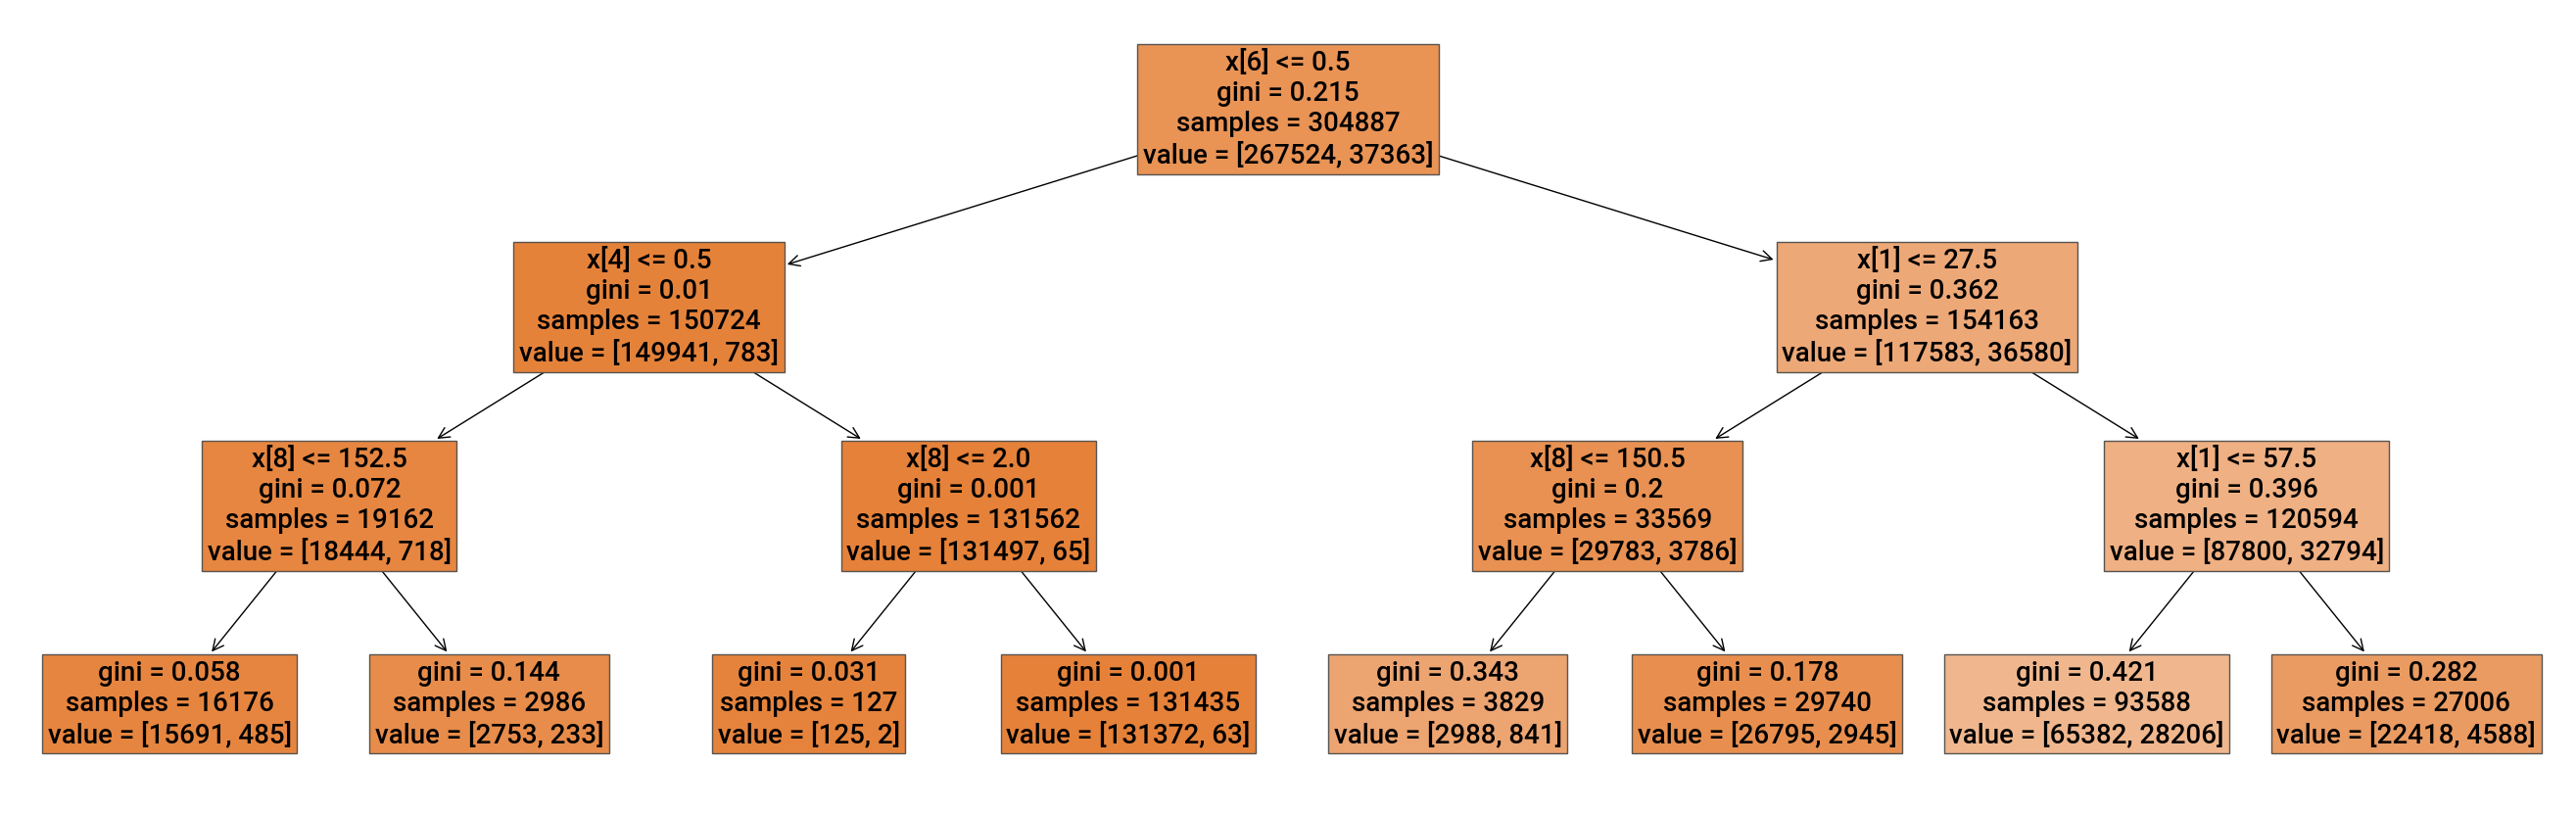

In [ ]:
plt.figure(figsize=(30,10))
tree.plot_tree(pruned_model,filled=True,fontsize=20)
plt.show()